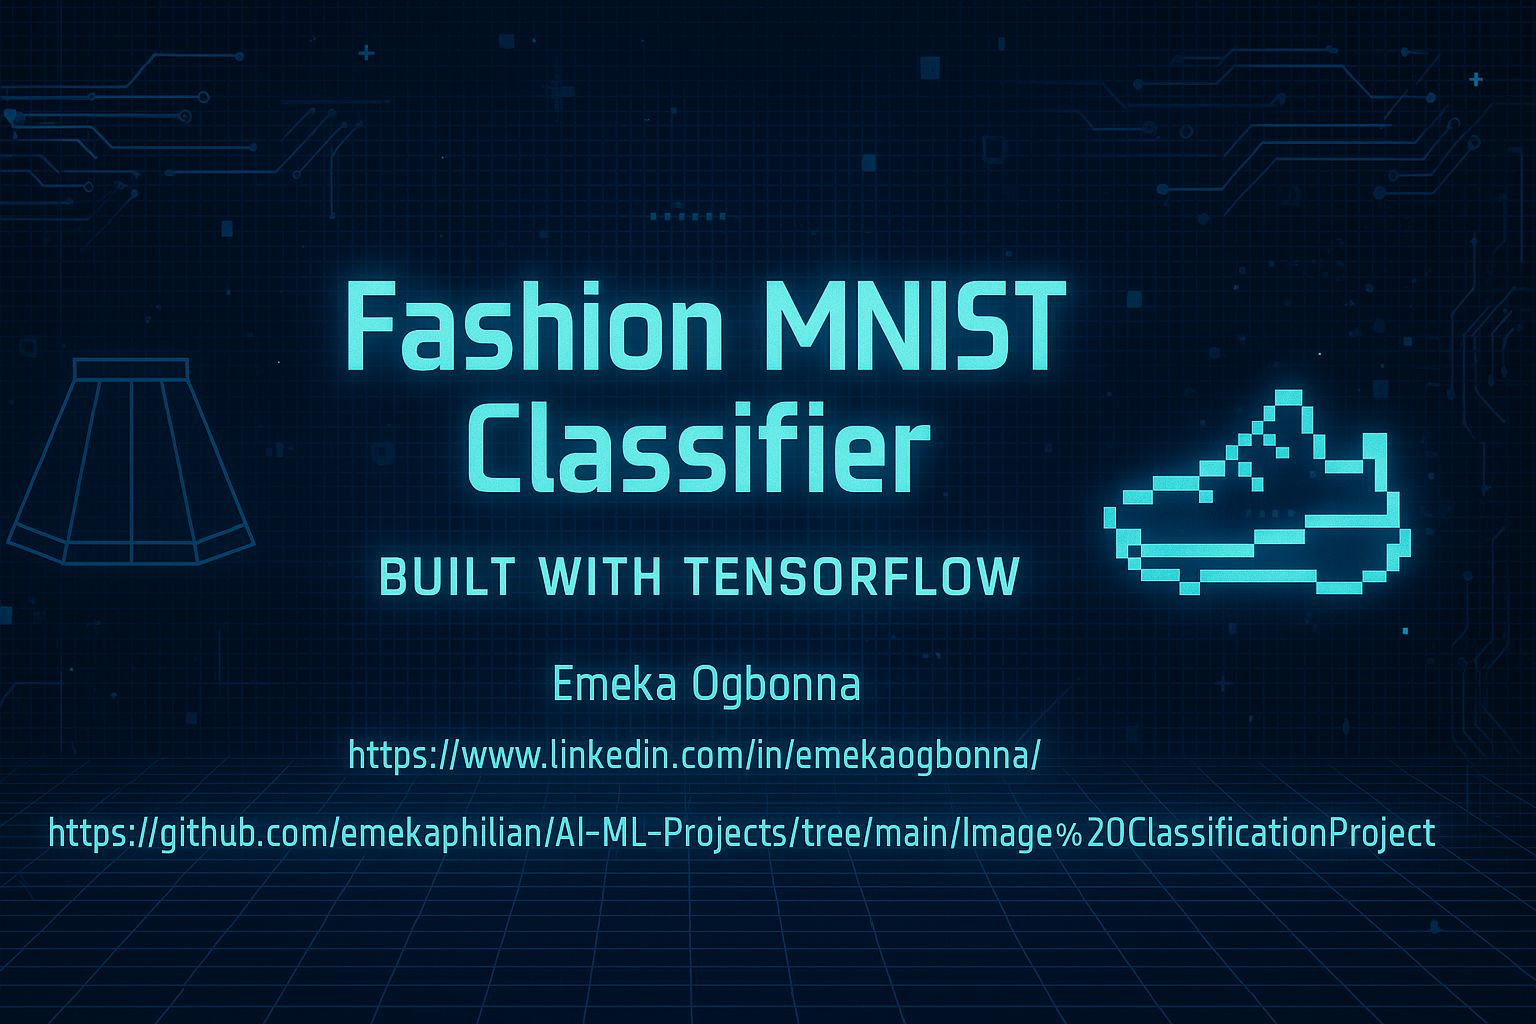

---

### 🔍 **Project Overview**

This project explores the application of deep learning for image classification using the **Fashion MNIST dataset**, a benchmark dataset often used for machine learning model evaluation. By leveraging **TensorFlow** and **Keras**, I developed a **Convolutional Neural Network (CNN)** capable of accurately predicting categories of grayscale fashion images.

The entire workflow includes **data preprocessing**, **model building**, **training and evaluation**, and an **interactive user interface** where anyone can input an image index to receive a prediction along with a visual display and confidence score.

Whether you're a beginner exploring CNNs or a data science enthusiast looking for an end-to-end project, this one offers both learning and application value.

---

### 🎯 **Project Objectives**

- ✅ **Develop a high-performing CNN** to classify fashion items into 10 categories.
- ✅ **Implement preprocessing techniques** for image normalization and data visualization.
- ✅ **Train and validate the model** using the Fashion MNIST dataset.
- ✅ **Visualize model performance** with accuracy/loss plots and confusion matrix.
- ✅ **Create an interactive CLI tool** where users input an image index and receive the prediction result.
- ✅ **Package the solution** into a clean, reproducible `.py` script with proper documentation.
- ✅ **Showcase the project** in a professional GitHub repository, complete with README, banner, and LinkedIn post/article.

---
---

## 🧰 Tech Stack

- Python 3.x
- TensorFlow / Keras
- Matplotlib
- NumPy

---

## 🖼️ Dataset Details

The Fashion MNIST dataset includes:
- 60,000 training images
- 10,000 test images
- 10 total fashion categories:

| Label | Class        |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |

---

## 🧠 Model Architecture

- Input Layer: 28x28 grayscale images
- 2 Convolutional Layers + MaxPooling
- Flatten + Dense Layers
- Output Layer with 10 softmax neurons

The model is trained using **Sparse Categorical Crossentropy** and **Adam optimizer** with high accuracy on validation data.

---

## ✨ Interactive Prediction

At the end of the script, you’ll find an **interactive section** where you can:
- Input an index (0–9999)
- View the corresponding image
- Get a prediction of the fashion category



IMPORTING LIBRARIES

In [ ]:
# Tensorflow and Tf.keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input # Import the Input layer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.18.0


IMPORTING & LOADING THE DATASET

In [ ]:
fashData = keras.datasets.fashion_mnist # using Fashdata as the variable to load the Fashion_mnist dataset

(train_images, train_labels), (test_images, test_labels) = fashData.load_data() # splitting the dataset into training data and testing data

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


CHECK IMAGE SHAPES

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images.shape

(60000, 28, 28)

So we got 60,000 images for tarining and 10,000 for testing the model. Both are made up of 28x28 pixels (784 in total)

DISPLAY IMAGES

select any number to display an image

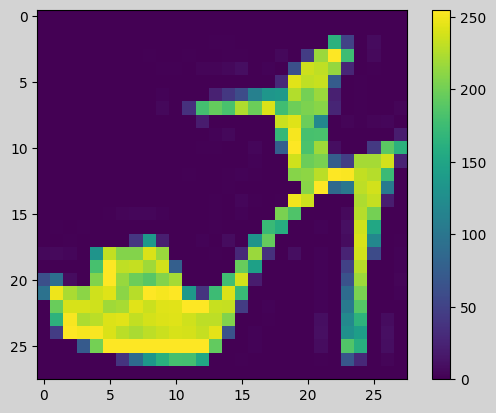

In [ ]:
plt.figure()
plt.imshow(train_images[9]) # Removed incorrect slicing arguments. Now displaying the image at index 9
plt.colorbar()
plt.grid(False)
plt.show()

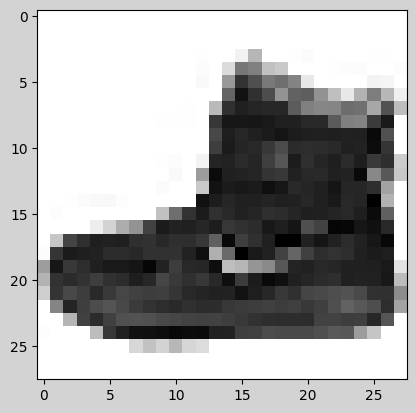

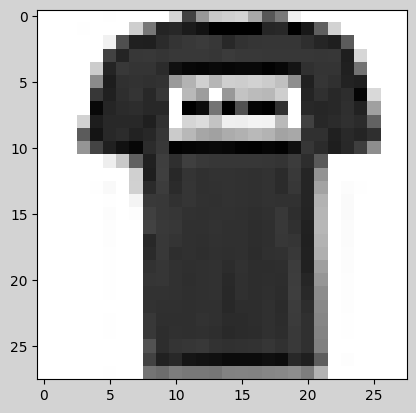

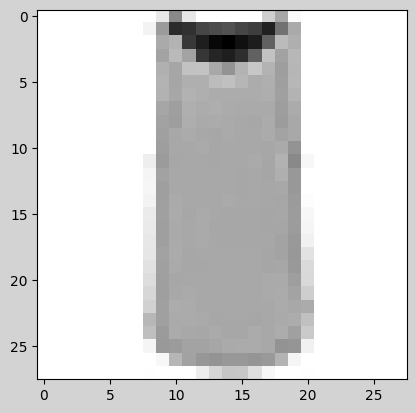

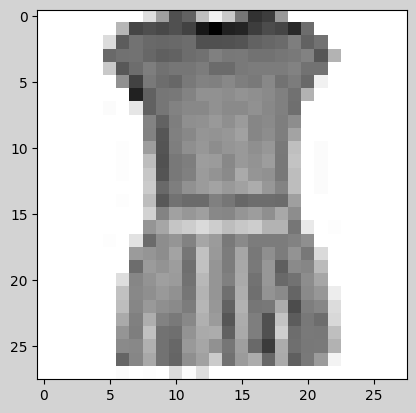

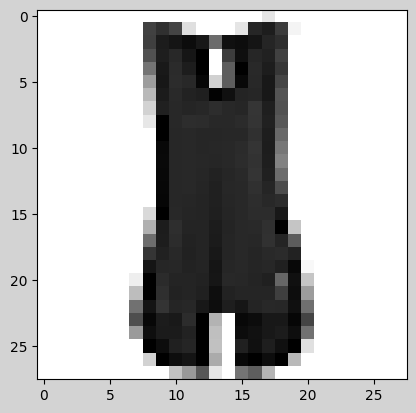

In [ ]:
# Display the first 5 images using matplotlib.pyplot
for i in range(5):
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Display image data as grayscale using cm.binary
    plt.show()

# Note pandas library not imported

NAME THE CLASSES OF THE IMAGES

There are different classes of fashion wears in the MNIST dataset, such as: T-shirt, Trouser, Pullover, Dress, coat, Sandal, shirt, Sneaker, bag, ankle boot


In [ ]:
# 10 Classes of images

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

CHOSING AND CREATING A MODEL

First is to Normalizing the image

In [ ]:
# Dividing each value in the training and test data by 255.0

test_images = test_images / 255.0
train_images = train_images / 255.0

print("Before Normalization:", train_images[0][0][0])  # Example pixel value (original)
print("After Normalization:", train_images[0][0][0] / 255.0)  # Normalized value

Before Normalization: 0.0
After Normalization: 0.0


Then Chose Model in KERAS

*Sequential Model*

In [ ]:
model = keras.Sequential([
    Input(shape=(28, 28)),  # Input layer - now correctly defined # ✅ Preferred way
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    keras.layers.Dropout(0.2),  # Dropout layer in the hidden layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with softmax activation
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MODEL COMPILATION & OPTIMIZATION

In [ ]:
# Compiling the model with optimizer and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

MODEL TRAINING


In [ ]:

# This tells the model: “Look at the training images and their labels, learn patterns, and repeat the process 10 times to improve your accuracy.”

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7606 - loss: 0.6869
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8531 - loss: 0.4050
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8645 - loss: 0.3730
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8707 - loss: 0.3476
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8769 - loss: 0.3326
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8840 - loss: 0.3136
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8854 - loss: 0.3116
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8921 - loss: 0.2960
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8928 - loss: 0.2883
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8937 - loss: 0.2851


MODEL TESTING AND EVALUATION

In [ ]:
# This tells the model: “Check how well you perform on new images you’ve never seen before and give me your accuracy and error rate.”

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8834 - loss: 0.3303

Test accuracy: 0.883400022983551


Great job! Your test accuracy is now 88.34%, which is a huge improvement from 10.56%! 🚀

This means your model is now learning patterns correctly from the Fashion MNIST dataset.

In [ ]:
test_images.shape

(10000, 28, 28)

PRINTING PREICTIONS

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sneaker


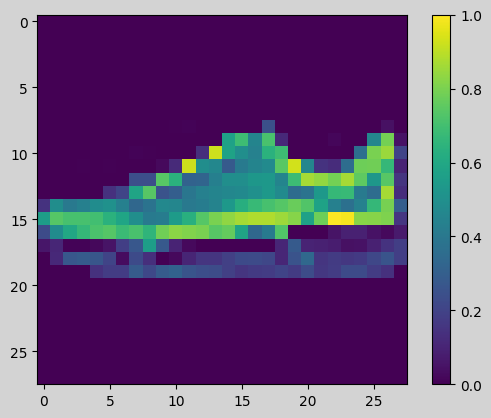

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[9])])
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()

PRINTING AND VERIFYING PREDICTIONS

Here is a function that predicts the the input by showing us an output that looks like the input we inserted.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


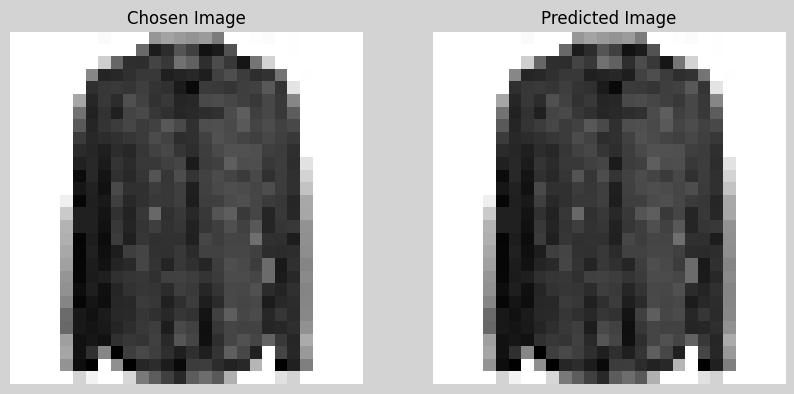

<ipython-input-108-72526ba3c876>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=prediction, palette='coolwarm')


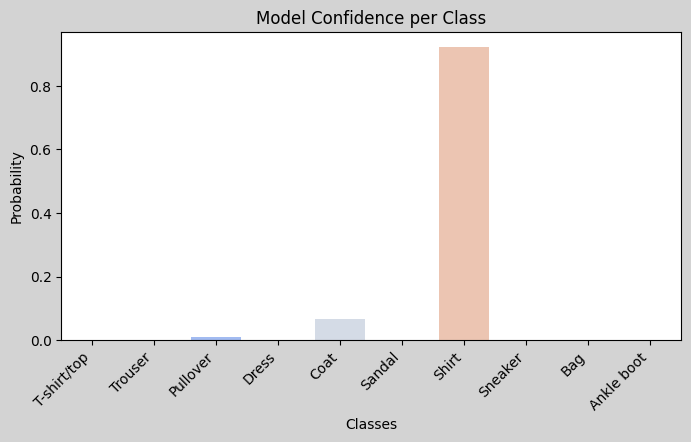

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


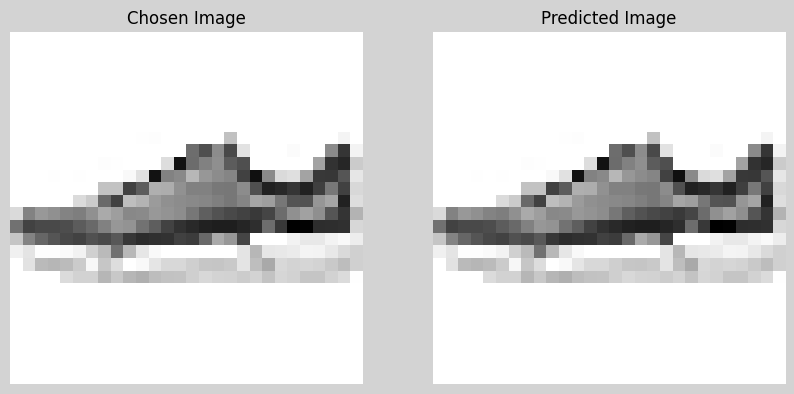

<ipython-input-108-72526ba3c876>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=prediction, palette='coolwarm')


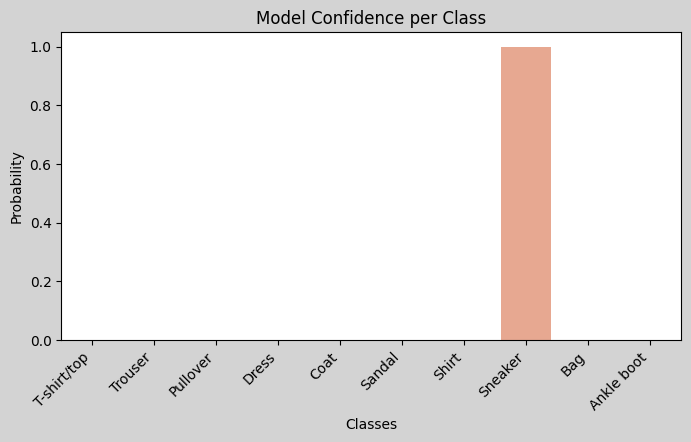

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


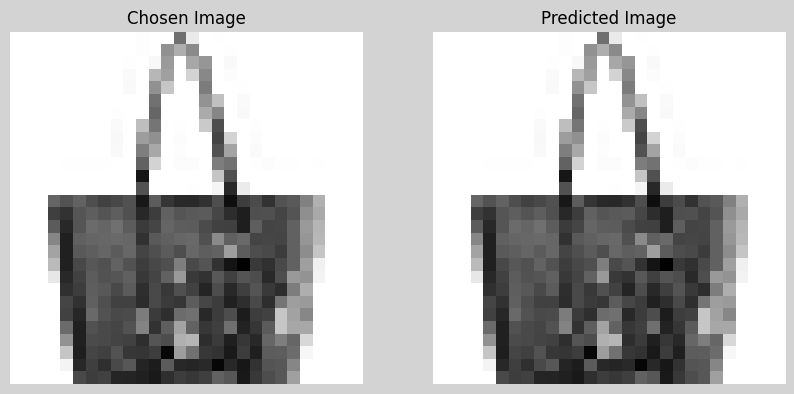

<ipython-input-108-72526ba3c876>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=prediction, palette='coolwarm')


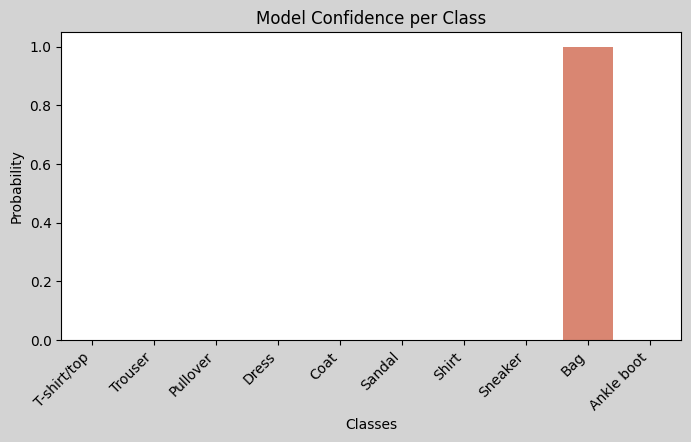

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


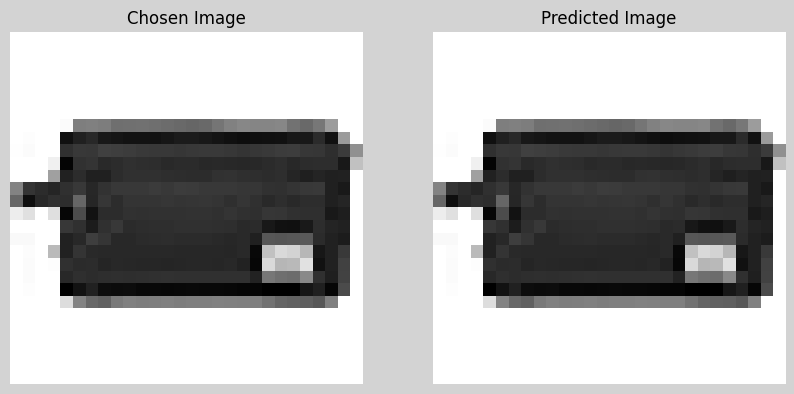

<ipython-input-108-72526ba3c876>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=prediction, palette='coolwarm')


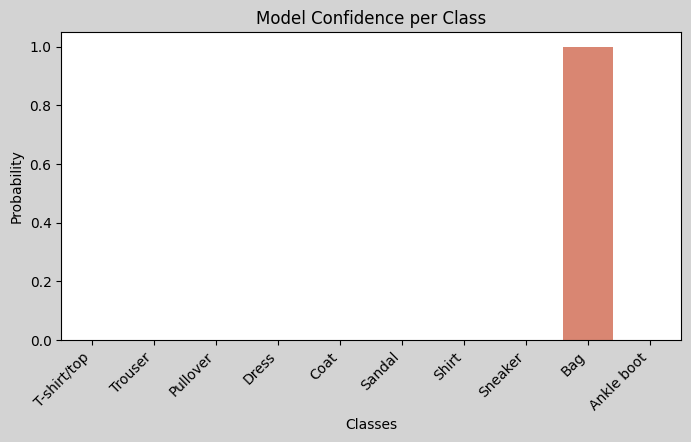

Pick a number (0-999) or type 'exit' to quit: exit
Exiting... Goodbye!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set color theme for better UI
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'lightgray'

# Class labels for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_and_display(model, image, correct_label):
    prediction = model.predict(np.array([image]))[0]  # Get predictions
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]

    show_images(image, correct_label, predicted_class, prediction)

def show_images(img, label_index, guess, prediction):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display the chosen image
    axes[0].imshow(img, cmap=plt.cm.binary)
    axes[0].set_title("Chosen Image")
    axes[0].set_xlabel(f"Actual: {class_names[label_index]}")
    axes[0].axis('off')

    # Display the predicted image (Placeholder: Reuse same image)
    axes[1].imshow(img, cmap=plt.cm.binary)
    axes[1].set_title("Predicted Image")
    axes[1].set_xlabel(f"Predicted: {guess}")
    axes[1].axis('off')

    plt.show()

    # Display probability distribution as a bar chart
    plt.figure(figsize=(8, 4))
    sns.barplot(x=class_names, y=prediction, palette='coolwarm')
    plt.xticks(rotation=45, ha='right')
    plt.title("Model Confidence per Class")
    plt.ylabel("Probability")
    plt.xlabel("Classes")
    plt.show()

def get_number():
    while True:
        num = input("Pick a number (0-999) or type 'exit' to quit: ")
        if num.lower() == 'exit':
            return None
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 999:
                return num
        print("Invalid input. Try again...")

def run_prediction_loop(model, test_images, test_labels):
    while True:
        num = get_number()
        if num is None:
            print("Exiting... Goodbye!")
            break
        image = test_images[num]
        label = test_labels[num]
        predict_and_display(model, image, label)

# Start the prediction loop when script runs
if __name__ == "__main__":
    run_prediction_loop(model, test_images, test_labels)


# **DATASET**

Using the MNIST Fashion dataset from keras. The Dataset includes 60,000 images for training and 10,000 images for validation/testing


## PREPROCESSING DATA



```
test_images = test_images / 255.0
train_images = train_images / 255.0
```



The step before creating our model is to preprocess the data. This simply means applying some prior transformations to our data before feeding it to the model. So since smaller values will make easier for the model to process, we simply scale all the greyscale pixel values of (0 - 255) to 0 and 1. we can do this dividing each value in the training and testing sets by 255.0. This is called data normalization, which improves the performance of the neural network.

**Reason:**

Pixel values in an image range from 0 to 255 (since images are stored in 8-bit format).

- 0 represents black.

- 255 represents white.

- Values in between represent different shades of gray.

By dividing all pixel values by 255.0, we scale them to the range 0 to 1.
This process is called *Min-Max Normalization*:

- Normalized Pixel
=
Original Pixel Value
255


**For example:**

- Original: A pixel with value 128 → Normalized: 128/255 = 0.502

- Original: A pixel with value 255 → Normalized: 255/255 = 1.0

- Original: A pixel with value 0 → Normalized: 0/255 = 0.0

**Why Is Normalization Important?**
- Helps the model train faster: Neural networks work best with small values, as large values make gradient descent (optimization) slower.
- Prevents numerical instability: Large values (like 255) can cause the model's weights to explode, leading to instability.
- Improves accuracy: Helps the model converge better and generalize well.
- Makes activation functions work better: Many activation functions (like ReLU, Sigmoid, and Softmax) perform best when inputs are between 0 and 1 or -1 and 1.

## **BUILDING THE MODEL**

We are going to use Keras Sequensial model which has 3 different layers. The model represents a feed-forward neural network (Meaninig; it flows from left to right )

**What is the Sequential Model in Keras? (Simple Explanation)**

Imagine you are making a sandwich 🍞🥪. You start with a slice of bread, add some lettuce, then some cheese, then meat, and finally another slice of bread. You layer each ingredient in a specific order—one after another.

A Sequential model in Keras works the same way. It builds a neural network step by step, layer by layer, just like stacking ingredients in a sandwich. Data flows through the layers in order, from the first layer to the last.



```
model = keras.Sequential([
    Input(shape=(28, 28)),  # Input layer - now correctly defined # ✅ Preferred way
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with ReLU activation
    keras.layers.Dropout(0.2),  # Dropout layer in the hidden layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with softmax activation
])
```




**How is the Sequential Model Used?**

1. Start with an Empty Plate (Initialize Model)

- You begin with an empty Sequential model.

- Add Ingredients (Layers)

- You add layers one by one (like input, hidden, and output layers).

- Choose Your Sauce (Compile the Model)

2. Select a loss function (to measure mistakes) and an optimizer (to help the model learn).

- Make the Sandwich (Train the Model)

- Give the model data, let it learn patterns, and adjust itself.

- Taste the Sandwich (Evaluate & Predict)

- Test how well it performs and use it to make predictions.


**How the Layers Work Together (Step-by-Step Data Flow)**

1️⃣ Input Image (28×28 pixels) →
2️⃣ Flatten Layer (Converts to 1D array of 784 values) →
3️⃣ First Dense Layer (Learns features like curves, edges) →
4️⃣ Dropout Layer (Prevents overfitting, ensures robustness) →
5️⃣ Output Layer (Softmax selects the most probable digit)

- Hidden layer (128 ReLU): Employs 128 neurons to extracts features like curves, edges, and shapes from each images.

- Dropout (0.2): Turns off 20% (0.2) neurons during training to Prevents overfitting, ensuring the model works well on new images.

- Output layer (10 Softmax): Employs 10 neurons in the output to represent each classes of image and Converts features into a probability for each digit (e.g., 95% chance it’s a "5").

# MODEL COMPILATION

```
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```
**Summary in Simple Terms**

**Parameter	Meaning	Why is it used?**
- *optimizer='adam'*	= Controls how the model updates its knowledge. And	adjusts learning speed for better training.

- *loss='sparse_categorical_crossentropy'*	= Measures how wrong the model is. It	helps improve predictions by reducing mistakes.

- *metrics=['accuracy']*	= Tracks how well the model is performing. And helps monitor progress during trainin.


# MODEL TRAINING

`model.fit(train_images, train_labels, epochs=10)`

### **🔹 Summary in Simple Terms**
**Code	Meaning	Why is it important?**
- *train_images* -	Training the model on the images.	The model learns from these patterns.

- *train_labels* -	Checks and Correct the answers from the (labels).	Helps the model know if it's right or wrong.

- *epochs=10* -	Repeat learning 10 times as	More practice improves accuracy.

This command starts the learning process for the model.

It shows images, checks answers, and improves over 10 rounds to become smarter at recognizing patterns.

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')# MODEL TESTING AND EVALUATION

```
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
```



**What it does:**

Feeds the model new test images (test_images) to see how well it predicts.

Compares predictions to the correct labels (test_labels).

**Returns two values:**

- test_loss → The amount of error in predictions.

- test_acc → The accuracy percentage (how often the model was correct).